<a href="https://colab.research.google.com/github/Sam-Mucyo/digit-recognition/blob/main/digitrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing some libraries we will need


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import glob
import os

Get the mnist dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Add layers to the model


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Training the model

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 7s 12ms/step - loss: 0.3530 - accuracy: 0.9000
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1374 - accuracy: 0.9583
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0918 - accuracy: 0.9715
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0664 - accuracy: 0.9798
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0514 - accuracy: 0.9837


Save the trained model, to be used later without having to retrain it.

In [ ]:
model.save('handwritten.model')

In [ ]:
model = tf.keras.models.load_model("handwritten.model")

**TESTING WITH MORE THAN 1 IMAGES FROM A FOLDER**

When I was testing this, Google Colab couldn't allow me to upload a directory/folder. You might need to select all images, drag, and drop them in Colab (instead of uploading the entire folder). Or just create a new folder in Colab and then upload the images in that new folder.

**Usage:** You'll be prompted to enter the name of a folder with images you want to test. If you didn't create a folder and just uploaded images, ignore the prompt and just hit enter.


If you have just uploaded images, without creating a folder, ignore the prompt and just hit enter.

Name of the folder you with images: 
Image


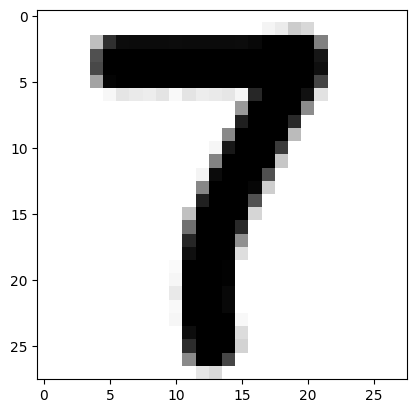

1/1 [==============================] - 0s 117ms/step
Prediction: 8
Image


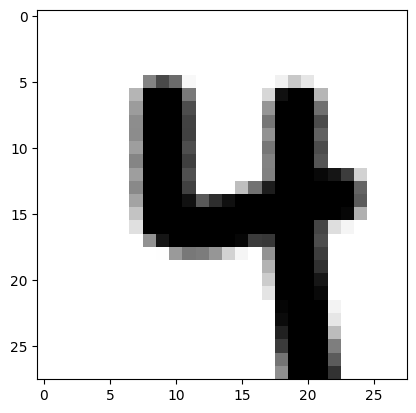

1/1 [==============================] - 0s 21ms/step
Prediction: 9
Image


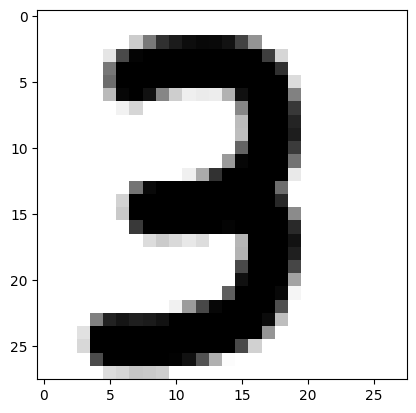

1/1 [==============================] - 0s 19ms/step
Prediction: 3
Image


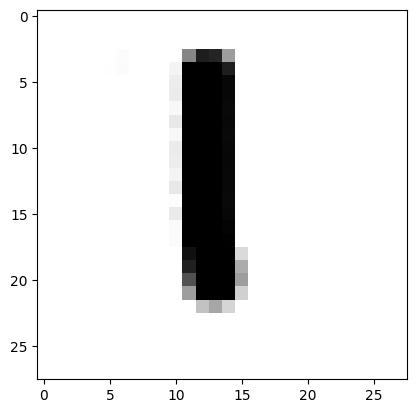

1/1 [==============================] - 0s 20ms/step
Prediction: 1
Image


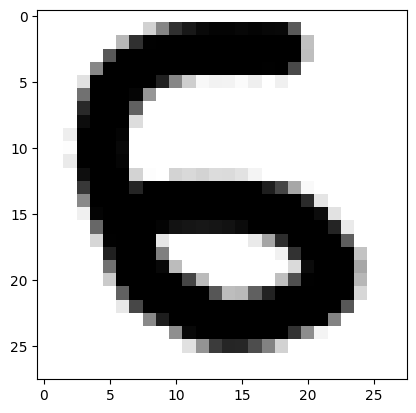

1/1 [==============================] - 0s 20ms/step
Prediction: 6
Image


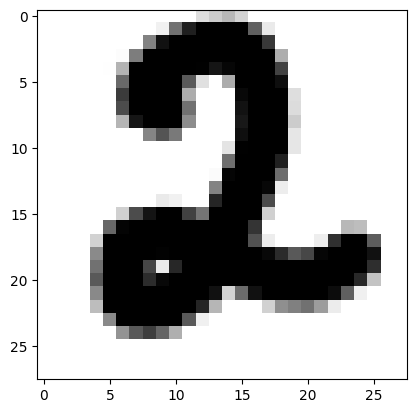

1/1 [==============================] - 0s 21ms/step
Prediction: 2
Image


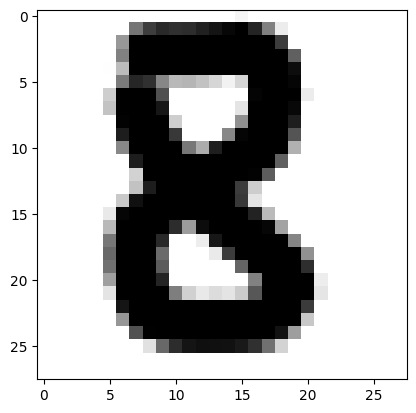

1/1 [==============================] - 0s 20ms/step
Prediction: 8
Image


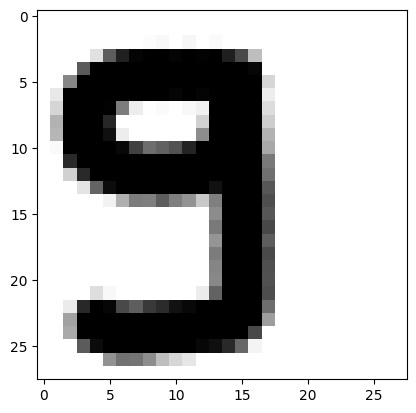

1/1 [==============================] - 0s 21ms/step
Prediction: 3
Image


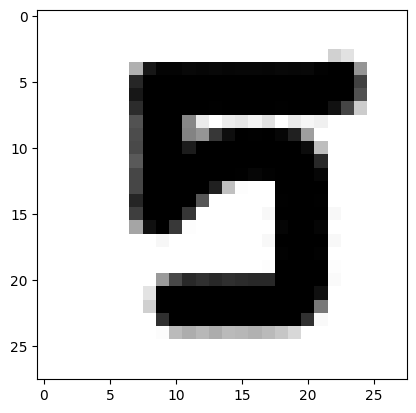

1/1 [==============================] - 0s 20ms/step
Prediction: 5
Image


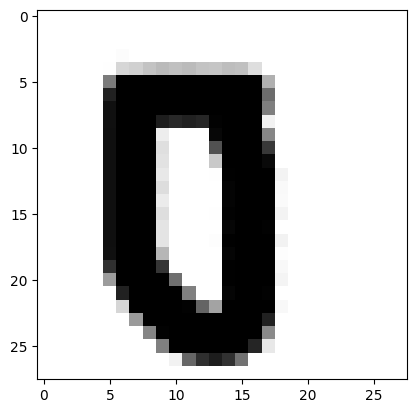

1/1 [==============================] - 0s 31ms/step
Prediction: 3


In [ ]:
import os
from pathlib import Path
import glob

path = os.path.expanduser('/content/')
print("If you have just uploaded images, without creating a folder, ignore the prompt and just hit enter.\n")
new_folder = input("Name of the folder you with images: ")
images = glob.glob(path + f'/{new_folder}' '/*.png')

for image_path in images:
  img_name = image_path.replace("/content/", "")
  # read the image
  img = cv.imread(img_name)[:,:,0]
  # Inverting from white background to black background
  img = np.invert(np.array([img]))
  # Displaying Image
  plt.imshow(img[0], cmap=plt.cm.binary)
  print(f"Image")
  plt.show()
  # Run the model to predict
  prediction = model.predict(img)
  print(f"Prediction: {np.argmax(prediction)}")




**TESTING AN IMAGE**


file name: 5.png
Image


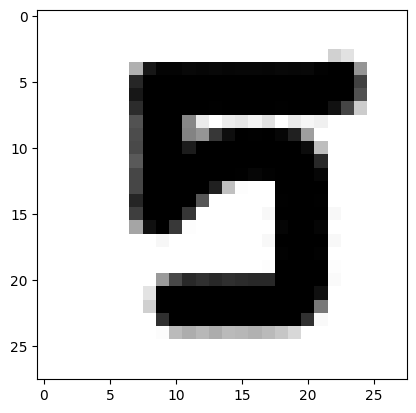

1/1 [==============================] - 0s 22ms/step
Prediction: 5


In [ ]:

img_name = input("file name: ")
# read the image
img = cv.imread(img_name)[:,:,0]

# Inverting from white background to black background
img = np.invert(np.array([img]))

# Displaying Image
plt.imshow(img[0], cmap=plt.cm.binary)
print(f"Image")
plt.show()

# Run the model to predict
prediction = model.predict(img)

print(f"Prediction: {np.argmax(prediction)}")
